In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_table("tagged.csv")

In [5]:
df.head()

,n_comments,year,title,speaker_info,section,target_audience,type,prerequisites,description,speaker_link_present,content_url_present,deadlinediff,selected
0,0,2015,consuming government data python d,pratap vardhan data scientist gramenercom data...,data visualization analytics,intermediate,talks,NaN,the explosion open data especially government ...,False,False,-94,True
1,1,2015,dont get scared get started,tapasweni pathaki done bachelors it igdtuw i w...,others,beginner,talks,nothingother passion coding,opensource world full excitement knowledge enc...,False,False,1,False
2,0,2015,distributed scheduling leveraging multiple nod...,i software engineer red hat inc working gluste...,concurrency,beginner,talks,a basic understanding distributed system works...,setting cron job machine perhaps easiest way s...,True,True,35,False
3,0,2015,analyzing python code pylint,im open source enthusiast coming romania lead ...,others,intermediate,talks,the participants basic understanding python no...,given dynamic nature python bugs tend creep co...,False,False,-112,False
4,0,2015,python metaprogramming macros madness more,suhas data scientist gramener previously engin...,core python,intermediate,talks,NaN,summaryever wanted conquer world fell short kn...,False,False,-94,True


In [6]:
df.columns

Index([u'n_comments', u'year', u'title', u'speaker_info', u'section',
       u'target_audience', u'type', u'prerequisites', u'description',
       u'speaker_link_present', u'content_url_present', u'deadlinediff',
       u'selected'],
      dtype='object')

In [7]:
categoricals = []
for col in "section target_audience type".split():
    categoricals.append(pd.get_dummies(df[col]).values)

In [8]:
[x.shape for x in categoricals]

[(290, 13), (290, 3), (290, 2)]

In [9]:
import numpy as np

In [10]:
xCat = np.hstack(categoricals)

In [11]:
xCat.shape

(290, 18)

In [12]:
xBool = df['speaker_link_present content_url_present'.split()].astype(int)

In [13]:
xText = df['title speaker_info prerequisites description'.split()].copy()
xText.fillna(value=" ", inplace=True)

In [15]:
xText = xText.apply(lambda x: " ".join(x), axis=1)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
xText = TfidfVectorizer().fit_transform(xText.values)

In [18]:
xNum = df['n_comments deadlinediff'.split()].values

In [25]:
X = np.hstack([xCat, xBool, xText, xNum])
y = df['selected'].astype(int)

ValueError: all the input arrays must have same number of dimensions

In [38]:
feats = [xCat, xBool.values, xText.toarray(), xNum]

In [43]:
X = np.hstack(feats)
y = df['selected'].astype(int).values

In [44]:
from scipy.io import savemat
savemat("trainData.mat", dict(X=X, y=y))

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
xScaled = StandardScaler().fit_transform(X)

In [47]:
from sklearn.linear_model import LogisticRegression
from jeeves.cross_validation import report_stratifiedKfold_cv

In [48]:
report_stratifiedKfold_cv(LogisticRegression(), X, y, shuffle=True)

,accuracy_score,recall_score
0,0.813559,0.384615
1,0.844828,0.615385
2,0.793103,0.461538
3,0.844828,0.307692
4,0.859649,0.500000


In [49]:
from sklearn.svm import SVC

In [50]:
report_stratifiedKfold_cv(SVC(), X, y, shuffle=True)

,accuracy_score,recall_score
0,0.847458,0.384615
1,0.879310,0.615385
2,0.810345,0.538462
3,0.862069,0.538462
4,0.859649,0.583333


In [51]:
x_non_text = [xCat, xBool.values, xNum]

In [52]:
x_non_text = np.hstack(x_non_text)

In [53]:
x_non_text_scaled = StandardScaler().fit_transform(x_non_text)

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

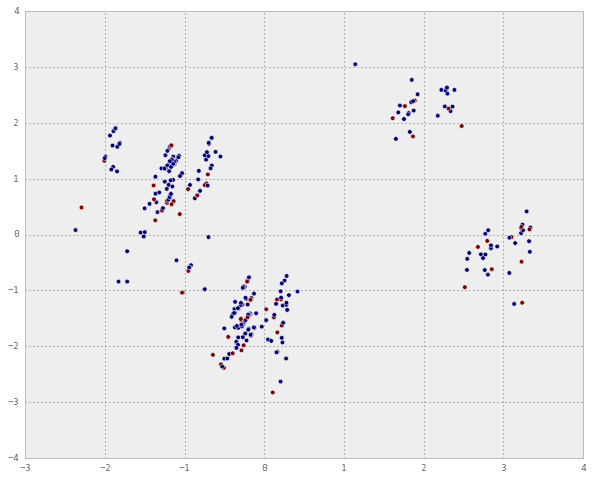

In [55]:
x_red = pca.fit_transform(x_non_text_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(x_red[:, 0], x_red[:, 1], c=y)

In [57]:
report_stratifiedKfold_cv(LogisticRegression(), x_non_text_scaled, y, shuffle=True)

,accuracy_score,recall_score
0,0.881356,0.692308
1,0.758621,0.384615
2,0.724138,0.307692
3,0.896552,0.615385
4,0.859649,0.333333


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
report_stratifiedKfold_cv(RandomForestClassifier(), x_non_text, y, shuffle=True, n_folds=10)

,accuracy_score,recall_score
0,0.866667,0.428571
1,0.900000,0.857143
2,0.866667,0.571429
3,0.833333,0.285714
4,0.827586,0.500000
5,0.793103,0.666667
6,0.821429,0.333333
7,0.892857,0.500000
8,0.857143,0.500000
9,0.892857,0.666667


In [63]:
report_stratifiedKfold_cv(DecisionTreeClassifier(), x_non_text, y, shuffle=True, n_folds=10)

,accuracy_score,recall_score
0,0.933333,0.714286
1,0.933333,0.714286
2,0.966667,1.000000
3,0.933333,0.857143
4,0.896552,0.666667
5,0.896552,0.833333
6,0.964286,0.833333
7,0.857143,0.666667
8,0.928571,0.666667
9,0.892857,0.666667


In [65]:
print report_stratifiedKfold_cv(RandomForestClassifier(), x_non_text, y, shuffle=True, n_folds=10).mean()
print report_stratifiedKfold_cv(RandomForestClassifier(), X, y, shuffle=True, n_folds=10).mean()

accuracy_score    0.878834
recall_score      0.621429
dtype: float64
accuracy_score    0.779573
recall_score      0.016667
dtype: float64


In [64]:
print report_stratifiedKfold_cv(DecisionTreeClassifier(), x_non_text, y, shuffle=True, n_folds=10).mean()
print report_stratifiedKfold_cv(DecisionTreeClassifier(), X, y, shuffle=True, n_folds=10).mean()

accuracy_score    0.916921
recall_score      0.780952
dtype: float64
accuracy_score    0.879204
recall_score      0.766667
dtype: float64
